In [1]:
import pandas as pd
import numpy as np
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n,
    sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction)

input_file = "C:/Users/LENOVO/Desktop/project data/data.csv"
df = pd.read_csv(input_file, header = 0)
df.head()

,#stream,isp,browser,connected,p2p,cdn
0,1,Fro,Iron,True,195910.840977,109025.960619
1,1,Fro,EarthWolf,True,186711.522041,113744.856814
2,1,Arange,Iron,True,189428.293434,115944.246844
3,1,Arange,Iron,True,0.000000,307577.191067
4,1,BTP,EarthWolf,True,207246.640473,107010.608093


In [3]:
summary = df.describe()
print(summary)

             #stream           p2p           cdn
count  534954.000000  5.349540e+05  5.349530e+05
mean        4.354741  3.540061e+06  1.532365e+07
std         2.576618  1.243739e+07  3.328645e+07
min         1.000000  0.000000e+00  2.851538e+03
25%         2.000000  0.000000e+00  7.726825e+04
50%         4.000000  1.247840e+05  1.901855e+05
75%         7.000000  1.941179e+05  2.071052e+05
max         9.000000  5.249998e+07  1.049986e+08


In [20]:
def compare(a,b):
    if a < b:
     print("the number of downloads of cdn is big than p2p")
    else:
     print("the number of downloads of p2p is big than cdn")

compare(5.349540e+05,5.349530e+05)


the number of downloads of p2p is big than cdn


In [5]:
df1 = DplyFrame(df)
df1 >> select(X.isp, X.browser, X.connected, X.p2p)
print(df1)
df.rename(columns={'#stream': 'stream'}, inplace=True)

        stream            isp    browser  connected            p2p  \
0            1            Fro       Iron       True  195910.840977   
1            1            Fro  EarthWolf       True  186711.522041   
2            1         Arange       Iron       True  189428.293434   
3            1         Arange       Iron       True       0.000000   
4            1            BTP  EarthWolf       True  207246.640473   
5            1            Fro  EarthWolf       True  193545.419945   
6            1            Fro  EarthWolf       True  214701.657705   
7            1            Fro  EarthWolf       True  202609.284270   
8            1         Arange  EarthWolf       True  217679.617147   
9            1            Fro  EarthWolf       True  198266.115340   
10           1            Fro  EarthWolf       True  199248.784001   
11           1         Arange       Iron       True  189400.980615   
12           1            Fro       Iron       True  188826.012957   
13           1      

In [7]:
p2p_isp = df.pivot_table(index=['stream'],columns=['isp'],values='p2p')
p2p_isp.head()

isp,Arange,BTP,Datch Telecam,Fro,Olga
stream,,,,,
1,177086.762849,1.788910e+05,38216.914804,1.699926e+05,25987.584611
2,115386.469353,1.155887e+05,25189.391315,1.098717e+05,25603.269906
3,12196.422980,1.208289e+04,2787.211731,1.186080e+04,2282.017329
4,897529.163638,4.543928e+07,406774.540440,1.724469e+06,25437.241381
5,109373.894429,1.089931e+05,21830.052482,1.048301e+05,23426.218209


In [9]:
summary_1 = p2p_isp.describe()
print(summary_1)

isp           Arange           BTP  Datch Telecam           Fro          Olga
count       9.000000  9.000000e+00       9.000000  9.000000e+00      9.000000
mean   265579.685054  1.013064e+07  101171.939111  4.448744e+05  18628.361790
std    363522.919377  1.993376e+07  166274.377963  7.242223e+05   9989.563312
min      5020.858560  5.117778e+03    1061.575051  4.755127e+03   2282.017329
25%     53395.735504  5.521578e+04   10243.492212  5.066691e+04   9828.579455
50%    115386.469353  1.155887e+05   24232.424418  1.098717e+05  24725.094076
75%    177086.762849  1.788910e+05   38216.914804  1.699926e+05  25603.269906
max    901478.152317  4.543928e+07  406774.540440  1.724469e+06  25987.584611


Text(0,0.5,'p2p by isp')

<Figure size 432x288 with 0 Axes>

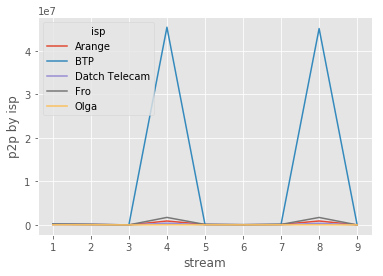

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use("ggplot")
plt.figure()
p2p_isp.plot()
plt.ylabel('p2p by isp')

In [13]:
cdn_isp = df.pivot_table(index=['stream'],columns=['isp'],values='cdn')
cdn_isp.head()

isp,Arange,BTP,Datch Telecam,Fro,Olga
stream,,,,,
1,1.228692e+05,1.210573e+05,2.615829e+05,1.300653e+05,2.736836e+05
2,8.465021e+04,8.445841e+04,1.746999e+05,9.013429e+04,1.747276e+05
3,1.877542e+05,1.879079e+05,1.975300e+05,1.881942e+05,1.972966e+05
4,9.911578e+07,5.451257e+07,9.956437e+07,9.826945e+07,1.000974e+08
5,9.057144e+04,9.104454e+04,1.781693e+05,9.521597e+04,1.765766e+05


Text(0,0.5,'cdn by isp')

<Figure size 432x288 with 0 Axes>

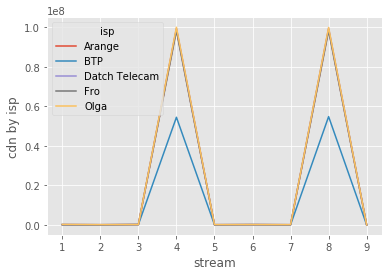

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use("ggplot")
plt.figure()
cdn_isp.plot()
plt.ylabel('cdn by isp')

In [21]:
df_p2p = df['p2p']
df_p2p.head()

0    195910.840977
1    186711.522041
2    189428.293434
3         0.000000
4    207246.640473
Name: p2p, dtype: float64

In [22]:
cdn_isp_Arange = cdn_isp['Arange']
cdn_isp_Arange.head()

stream
1    1.228692e+05
2    8.465021e+04
3    1.877542e+05
4    9.911578e+07
5    9.057144e+04
Name: Arange, dtype: float64

In [23]:
cdn_isp_corr = cdn_isp.corrwith(cdn_isp_Arange)
cdn_isp_corr = cdn_isp_corr.dropna()
cdn_isp_corr_df = pd.DataFrame(cdn_isp_corr)
cdn_isp_corr_df.head(10)

,0
isp,
Arange,1.000000
BTP,0.999993
Datch Telecam,0.999999
Fro,1.000000
Olga,0.999999


In [25]:
df.head()
cdn_browser = df.pivot_table(index=['stream'],columns=['browser'],values='cdn')
cdn_browser.head()

browser,EarthWolf,Iron,Swamp,Vectrice
stream,,,,
1,1.129346e+05,1.312049e+05,2.052807e+05,2.984034e+05
2,8.114941e+04,9.321571e+04,1.343464e+05,1.990944e+05
3,1.872957e+05,1.888087e+05,1.926261e+05,1.998348e+05
4,9.433457e+07,9.480478e+07,9.661411e+07,1.001363e+08
5,1.464239e+05,1.516763e+05,1.713636e+05,1.997867e+05


In [33]:
import numpy as np
cdn_browser_mean = np.mean(cdn_browser)
cdn_browser_mean.head()

browser
EarthWolf    1.793676e+07
Iron         1.833714e+07
Swamp        2.002014e+07
Vectrice     2.234744e+07
dtype: float64

In [34]:

p2p_browser = df.pivot_table(index=['stream'],columns=['browser'],values='p2p')
p2p_browser.head()

browser,EarthWolf,Iron,Swamp,Vectrice
stream,,,,
1,1.870094e+05,1.688349e+05,9.433037e+04,1719.720925
2,1.188723e+05,1.068291e+05,6.556713e+04,835.546986
3,1.268233e+04,1.121782e+04,7.333461e+03,79.875903
4,5.670997e+06,5.178956e+06,3.370550e+06,71663.268849
5,5.357145e+04,4.833785e+04,2.900979e+04,116.571425


In [35]:
import numpy as np
p2p_browser_mean = np.mean(p2p_browser)
p2p_browser_mean.head()

browser
EarthWolf    4.433096e+06
Iron         4.026681e+06
Swamp        2.321854e+06
Vectrice     3.532363e+04
dtype: float64

In [43]:
cdn_isp_corr = cdn_isp.corrwith(cdn_isp_Arange)
cdn_isp_corr = cdn_isp_corr.dropna()
cdn_isp_corr_df = pd.DataFrame(cdn_isp_corr)
cdn_isp_corr_df.head(10)

,0
isp,
Arange,1.000000
BTP,0.999993
Datch Telecam,0.999999
Fro,1.000000
Olga,0.999999


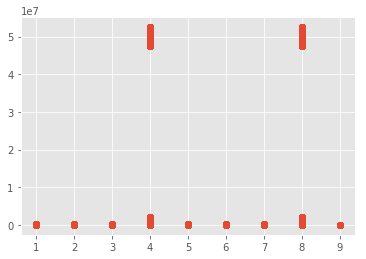

In [46]:
#Linear regression 
%matplotlib inline
import numpy as np
from pylab import *
scatter(df['stream'], df['p2p'])


In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['stream'], df['p2p'])


In [ ]:
print(r_value ** 2)